# Vizinhos mais Próximos

In [8]:
from google.colab import drive
import numpy as np
import pandas as pd

drive.mount('/content/drive')

x = pd.read_csv("/content/drive/MyDrive/Classroom/DCC127-2020.3-A - MINERAÇÃO DE DADOS - DEPTO DE CIENCIA DA COMPUTACAO  ICE/codigos/class_1_tr_X.dat")
y = pd.read_csv("/content/drive/MyDrive/Classroom/DCC127-2020.3-A - MINERAÇÃO DE DADOS - DEPTO DE CIENCIA DA COMPUTACAO  ICE/codigos/class_1_tr_Y.dat")
dados = pd.concat([x, y], axis=1)
print(dados)

novo = pd.DataFrame( [[2, 1]], columns=["x1", "x2"])
print(novo)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          x1        x2  y
0   4.152527  2.301919  0
1   1.371669  1.670895  0
2   1.626513  0.320023  0
3   1.905560 -1.653425  0
4   2.115576 -0.795658  0
..       ...       ... ..
95  4.439661  1.344021  1
96  1.427251  2.517953  1
97  5.804267  1.416101  1
98  5.272703 -0.544832  1
99  3.300647  2.656515  1

[100 rows x 3 columns]
   x1  x2
0   2   1


In [10]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier( n_neighbors=3 )
modelo.fit( x, y )

yt = modelo.predict(novo)

print(yt)

[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


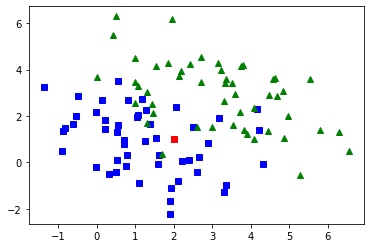

In [11]:
import matplotlib.pyplot as plt

x0 = dados.loc[ dados.y == 0 ]
x1 = dados.loc[ dados.y == 1 ]

plt.plot(x0.x1, x0.x2, "bs", x1.x1, x1.x2, "g^")
if yt[0] == 0:
  plt.plot(novo.x1, novo.x2, "rs")
else:
  plt.plot(novo.x1, novo.x2, "r^")

plt.show()

In [15]:
from sklearn.neighbors import RadiusNeighborsClassifier

modelo = RadiusNeighborsClassifier( radius=3 )
modelo.fit( x, y )

yt = modelo.predict(novo)

print(yt)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:404: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  SupervisedIntegerMixin.fit(self, X, y)


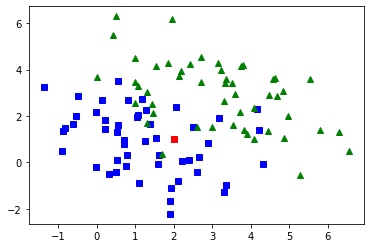

In [13]:
x0 = dados.loc[ dados.y == 0 ]
x1 = dados.loc[ dados.y == 1 ]

plt.plot(x0.x1, x0.x2, "bs", x1.x1, x1.x2, "g^")
if yt[0] == 0:
  plt.plot(novo.x1, novo.x2, "rs")
else:
  plt.plot(novo.x1, novo.x2, "r^")

plt.show()

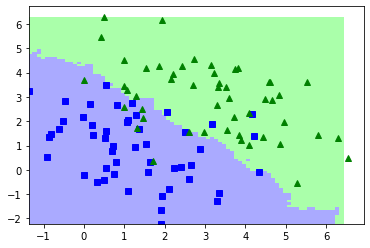

In [17]:
from matplotlib.colors import ListedColormap

h = 0.1
x1t, x2t = np.meshgrid(np.arange(min(x.x1), max(x.x1), h), np.arange(min(x.x2), max(x.x2), h))

yt = modelo.predict(np.c_[x1t.ravel(), x2t.ravel()])
yt = yt.reshape( x1t.shape )

cores = ListedColormap(["#AAAAFF", "#AAFFAA"])
plt.pcolormesh(x1t, x2t, yt, cmap=cores)
plt.plot(x0.x1, x0.x2, "bs", x1.x1, x1.x2, "g^")

plt.show()

# Método dos Mínimos Quadrados

In [18]:
dados.loc[ dados["y"] == 0, "y" ] = -1

print(dados)

          x1        x2  y
0   4.152527  2.301919 -1
1   1.371669  1.670895 -1
2   1.626513  0.320023 -1
3   1.905560 -1.653425 -1
4   2.115576 -0.795658 -1
..       ...       ... ..
95  4.439661  1.344021  1
96  1.427251  2.517953  1
97  5.804267  1.416101  1
98  5.272703 -0.544832  1
99  3.300647  2.656515  1

[100 rows x 3 columns]


In [23]:
A = np.zeros( shape=(len(dados), 3) )
A[:,0] = 1
A[:,1] = dados.x1
A[:,2] = dados.x2

A = np.matrix(A)
At = np.transpose(A)
Y = np.transpose(np.matrix(dados.y))

c = np.linalg.solve(At*A, At*Y)

print(c)

[[-1.28793803]
 [ 0.29634223]
 [ 0.33394516]]


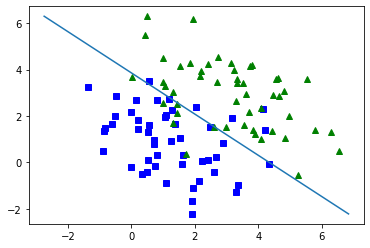

In [25]:
# g(x1, x2) = 0 ==> c0 + c1 x1 + c2 x2 = 0
x2t = np.linspace(min(dados.x2), max(dados.x2), 100)
x1t = ( -c[0, 0] - c[2, 0]*x2t ) / c[1, 0]

plt.plot(x0.x1, x0.x2, "bs", x1.x1, x1.x2, "g^", x1t, x2t, "-")
plt.show()

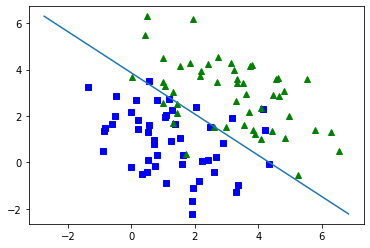

In [26]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit( dados.iloc[:, :2], dados.iloc[:, 2:] )

x1t = ( -modelo.intercept_ - modelo.coef_[0, 1]*x2t ) / modelo.coef_[0, 0]

plt.plot(x0.x1, x0.x2, "bs", x1.x1, x1.x2, "g^", x1t, x2t, "-")
plt.show()

# Regressão Logística

[[1.11147243 1.38041643]]
[-5.06753135]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


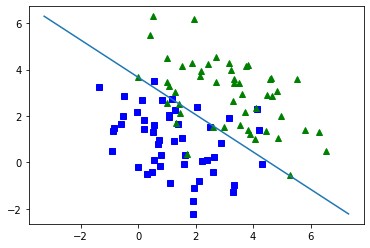

In [28]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit( dados.iloc[:, :2], dados.iloc[:, 2:] )

print(modelo.coef_)
print(modelo.intercept_)

x1t = ( -modelo.intercept_[0] - modelo.coef_[0][1]*x2t ) / modelo.coef_[0][0]

plt.plot(x0.x1, x0.x2, "bs", x1.x1, x1.x2, "g^", x1t, x2t, "-")
plt.show()

Exemplo
>- Adaptado do exemplo apresentado em http://www.estatisticacomr.uff.br/?p=598
>- $n=30$ instâncias
>- Variável dependente: autoavaliação de saúde (0=não boa, 1=boa)
>- idade variando de 20 a 95 anos
>- renda familiar per capita (0= Até 3 s.m., 1=Mais de 3 s.m.)

In [42]:
idade=[21,20,25,26,22,35,36,40,42,46,59,50,60,72,85,59,29,45,39,45,20,25,36,58,95,52,80,85,62,72]
renda=[1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1]
saude=[1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

x = pd.DataFrame( np.array([ idade, renda ]).transpose(), columns=["idade", "renda"] )
print(x)

    idade  renda
0      21      1
1      20      1
2      25      1
3      26      1
4      22      0
5      35      0
6      36      1
7      40      1
8      42      1
9      46      1
10     59      1
11     50      0
12     60      1
13     72      1
14     85      1
15     59      1
16     29      1
17     45      0
18     39      0
19     45      0
20     20      0
21     25      0
22     36      0
23     58      1
24     95      0
25     52      0
26     80      0
27     85      0
28     62      0
29     72      1


In [45]:
modelo = LogisticRegression()
modelo.fit(x, saude)

print(modelo.coef_)
print(np.exp(modelo.coef_))

[[-0.10360864  1.28714792]]
[[0.90157807 3.62244032]]


# Naïve Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.utils import shuffle

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [63]:
dados = pd.DataFrame( np.c_[ iris["data"], iris["target"] ], columns=iris["feature_names"] + ["target"] )
dados = shuffle(dados)
print(dados)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
102                7.1               3.0  ...               2.1     2.0
88                 5.6               3.0  ...               1.3     1.0
20                 5.4               3.4  ...               0.2     0.0
138                6.0               3.0  ...               1.8     2.0
146                6.3               2.5  ...               1.9     2.0
..                 ...               ...  ...               ...     ...
71                 6.1               2.8  ...               1.3     1.0
141                6.9               3.1  ...               2.3     2.0
148                6.2               3.4  ...               2.3     2.0
79                 5.7               2.6  ...               1.0     1.0
124                6.7               3.3  ...               2.1     2.0

[150 rows x 5 columns]


In [64]:
x = dados[10:]
modelo = GaussianNB()
modelo.fit(x.iloc[:, 0:4], x.iloc[:, 4:5])

yt = modelo.predict(dados.iloc[:10, 0:4])

print("Valores esperados:")
print(dados.iloc[:10, 4:5])

print("Valores preditos:")
yt = pd.DataFrame(np.array(yt).transpose(), columns=["y-predito"])
print(yt)

Valores esperados:
     target
102     2.0
88      1.0
20      0.0
138     2.0
146     2.0
70      1.0
62      1.0
56      1.0
40      0.0
57      1.0
Valores preditos:
   y-predito
0        2.0
1        1.0
2        0.0
3        2.0
4        2.0
5        2.0
6        1.0
7        1.0
8        0.0
9        1.0


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
acuracia = modelo.score(dados.iloc[:10, 0:4], dados.iloc[:10, 4:5])
print("Acurácia: %f"%acuracia)

Acurácia: 0.900000


# Árvores de Decisão

In [67]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(x.iloc[:, :4], x.iloc[:, 4:])

yt = modelo.predict(dados.iloc[:10, :4])

print("Valores esperados:")
print(dados.iloc[:10, 4:5])

print("Valores preditos:")
yt = pd.DataFrame(np.array(yt).transpose(), columns=["y-predito"])
print(yt)

acuracia = modelo.score(dados.iloc[:10, 0:4], dados.iloc[:10, 4:5])
print("Acurácia: %f"%acuracia)

Valores esperados:
     target
102     2.0
88      1.0
20      0.0
138     2.0
146     2.0
70      1.0
62      1.0
56      1.0
40      0.0
57      1.0
Valores preditos:
   y-predito
0        2.0
1        1.0
2        0.0
3        2.0
4        2.0
5        2.0
6        1.0
7        1.0
8        0.0
9        1.0
Acurácia: 0.900000


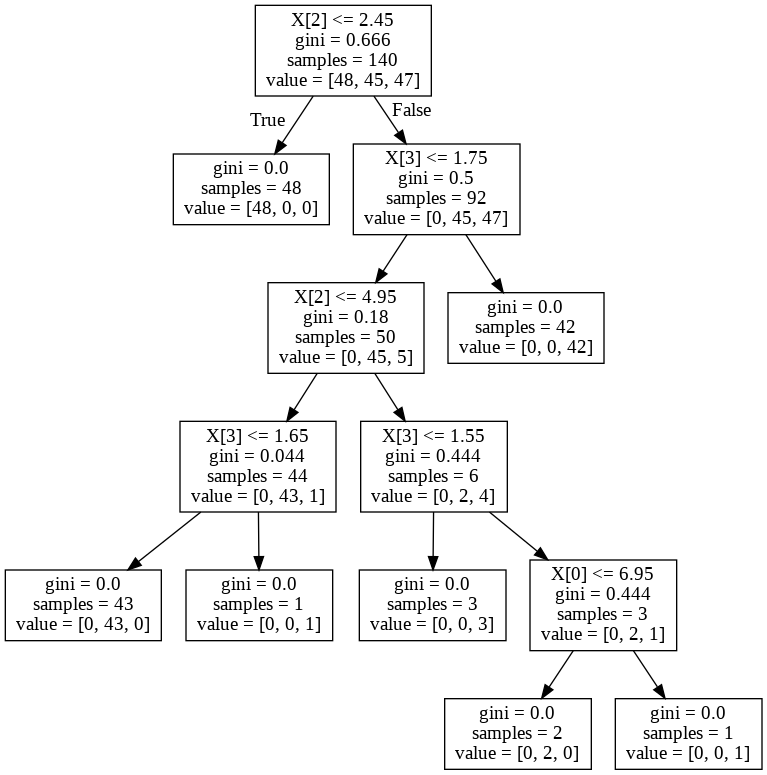

In [68]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

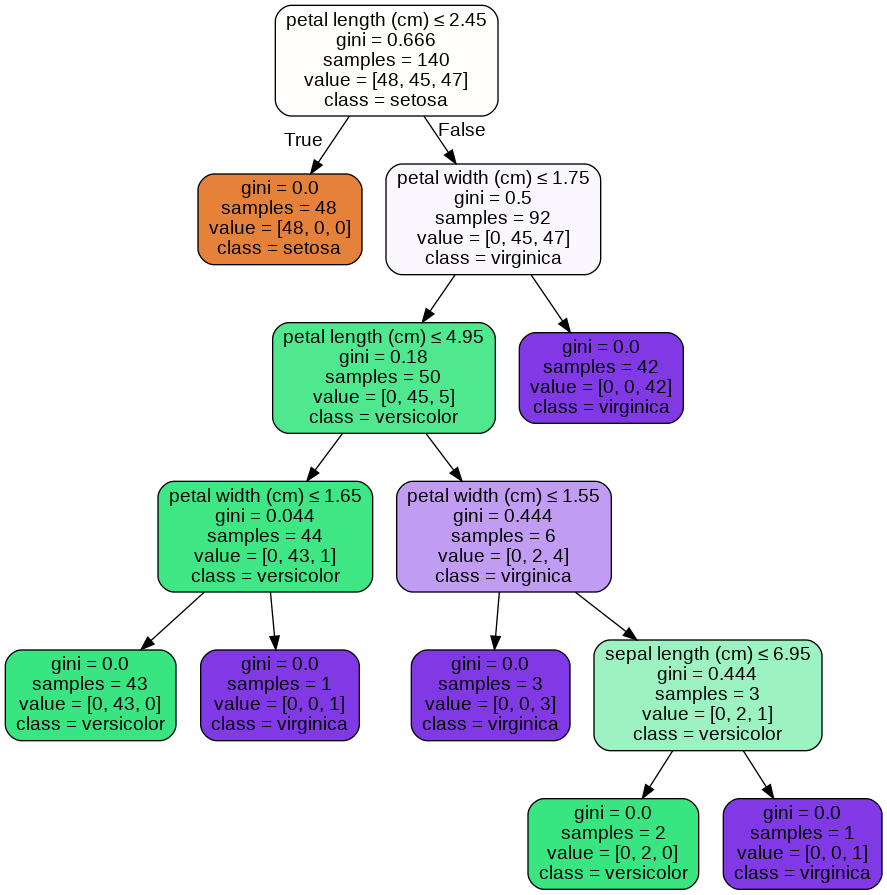

In [69]:
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=iris["feature_names"], class_names=iris["target_names"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Valores esperados:
     target
102     2.0
88      1.0
20      0.0
138     2.0
146     2.0
70      1.0
62      1.0
56      1.0
40      0.0
57      1.0
Valores preditos:
   y-predito
0        2.0
1        1.0
2        0.0
3        2.0
4        2.0
5        2.0
6        1.0
7        1.0
8        0.0
9        1.0
Acurácia: 0.900000


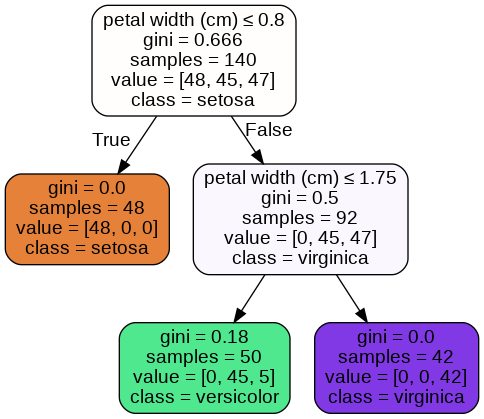

In [71]:
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(x.iloc[:, :4], x.iloc[:, 4:])

yt = modelo.predict(dados.iloc[:10, :4])

print("Valores esperados:")
print(dados.iloc[:10, 4:5])

print("Valores preditos:")
yt = pd.DataFrame(np.array(yt).transpose(), columns=["y-predito"])
print(yt)

acuracia = modelo.score(dados.iloc[:10, 0:4], dados.iloc[:10, 4:5])
print("Acurácia: %f"%acuracia)

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=iris["feature_names"], class_names=iris["target_names"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Valores esperados:
     target
102     2.0
88      1.0
20      0.0
138     2.0
146     2.0
70      1.0
62      1.0
56      1.0
40      0.0
57      1.0
Valores preditos:
   y-predito
0        2.0
1        1.0
2        0.0
3        2.0
4        2.0
5        2.0
6        1.0
7        1.0
8        0.0
9        1.0
Acurácia: 0.900000


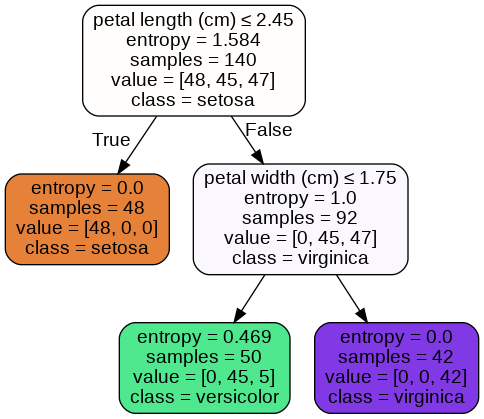

In [74]:
modelo = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelo.fit(x.iloc[:, :4], x.iloc[:, 4:])

yt = modelo.predict(dados.iloc[:10, :4])

print("Valores esperados:")
print(dados.iloc[:10, 4:5])

print("Valores preditos:")
yt = pd.DataFrame(np.array(yt).transpose(), columns=["y-predito"])
print(yt)

acuracia = modelo.score(dados.iloc[:10, 0:4], dados.iloc[:10, 4:5])
print("Acurácia: %f"%acuracia)

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=iris["feature_names"], class_names=iris["target_names"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())